In [1]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

In [2]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

In [3]:
print(zip_dir)

/home/aditya/.keras/datasets/cats_and_dogs_filtered.zip


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
print(os.listdir(zip_dir_base))
print(zip_dir_base)

['mnist.npz', 'fashion-mnist', 'cats_and_dogs_filtered', 'cats_and_dogs_filtered.zip']
/home/aditya/.keras/datasets


In [5]:
!find $zip_dir_base -type d -print

/home/aditya/.keras/datasets
/home/aditya/.keras/datasets/fashion-mnist
/home/aditya/.keras/datasets/cats_and_dogs_filtered
/home/aditya/.keras/datasets/cats_and_dogs_filtered/validation
/home/aditya/.keras/datasets/cats_and_dogs_filtered/validation/cats
/home/aditya/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/home/aditya/.keras/datasets/cats_and_dogs_filtered/train
/home/aditya/.keras/datasets/cats_and_dogs_filtered/train/cats
/home/aditya/.keras/datasets/cats_and_dogs_filtered/train/dogs


In [6]:
base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [7]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [8]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [9]:
BATCH_SIZE = 128
IMG_SHAPE = 150

# Data Augmentation

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [12]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2000 images belonging to 2 classes.


In [15]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_data_gen = image_gen_train.flow_from_directory(batch_size = BATCH_SIZE,
                                                     directory = train_dir,
                                                     shuffle = True,
                                                     target_size = (IMG_SHAPE, IMG_SHAPE),
                                                     class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [17]:
%matplotlib inline
def display_image_1(image_arr):
    fig, axes = plt.subplots(1, 5, figsize = (20, 20))
    axes = axes.flatten()
    
    for img, ax in zip(image_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()    

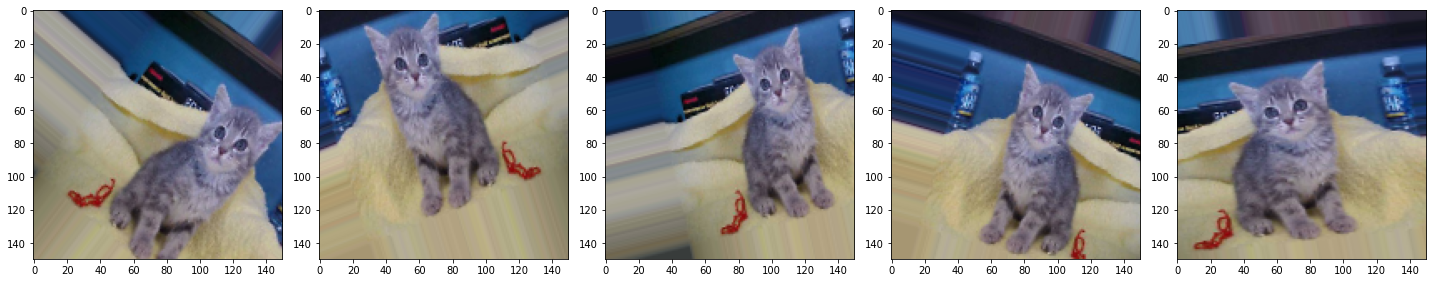

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
display_image_1(augmented_images)

In [20]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


# Model

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(2048, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(2, activation = 'softmax')
])

In [23]:
model.compile(optimizer='adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       1

In [26]:
import numpy as np
epochs=50
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
16/16 [==============================] - 45s 3s/step - loss: 0.6996 - accuracy: 0.4820 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/50
16/16 [==============================] - 49s 3s/step - loss: 0.6892 - accuracy: 0.5295 - val_loss: 0.6754 - val_accuracy: 0.5940
Epoch 3/50
16/16 [==============================] - 60s 4s/step - loss: 0.6775 - accuracy: 0.5675 - val_loss: 0.6450 - val_accuracy: 0.6370
Epoch 4/50
16/16 [==============================] - 58s 4s/step - loss: 0.6649 - accuracy: 0.6020 - val_loss: 0.6557 - val_accuracy: 0.6090
Epoch 5/50
16/16 [==============================] - 58s 4s/step - loss: 0.6610 - accuracy: 0.6050 - val_loss: 0.6758 - val_accuracy: 0.5920
Epoch 6/50
16/16 [==============================] - 58s 4s/step - loss: 0.6629 - accuracy: 0.6080 - val_loss: 0.7053 - val_accuracy: 0.5440
Epoch 7/50
16/16 [==============================] - 58s 4s/step - loss: 0.6524 - acc

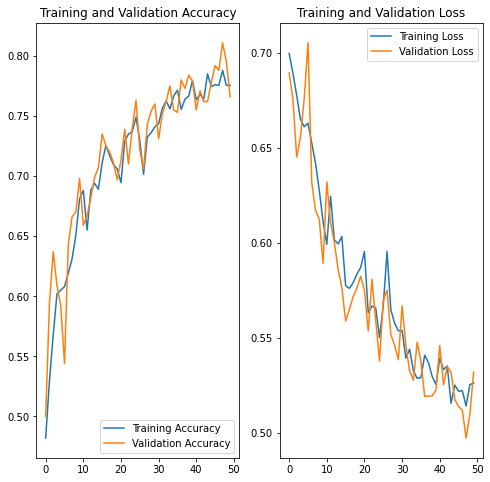

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()